<a href="https://colab.research.google.com/github/PDTCCLF/Projeto-Final---Mod-Emo-Int/blob/main/PF_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install hmmlearn
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=8b18d931ee90d191a9ffc3462a8ea43bbaa0282672c221ebfb5a7d2af79c0c92
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# Cube of emotions using Hidden Markov model

Most likely hidden states: [2 1 0 2 0 2 2 2 0 2]
Log Probability: -24.35534634201695
Most likely hidden states using Viterbi: [2 1 0 2 0 2 2 2 0 2]


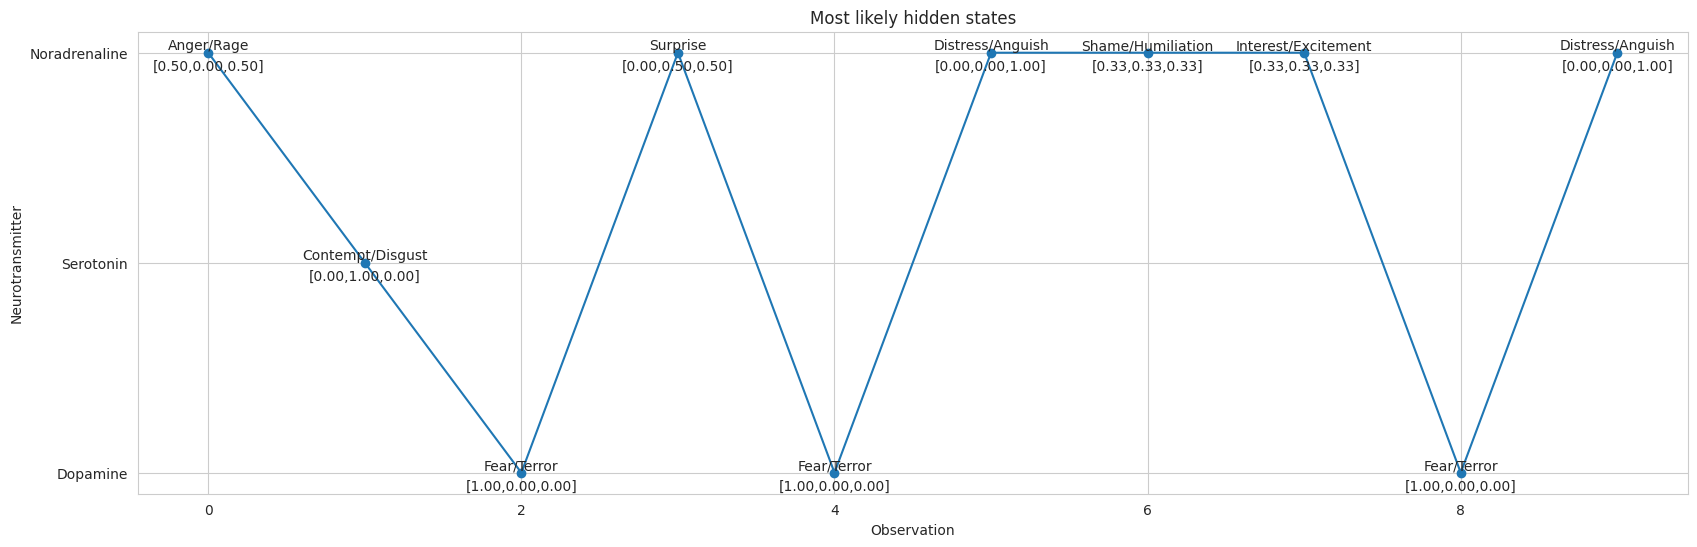

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

states = ["Dopamine", "Serotonin", "Noradrenaline"]

observations = ["Anger/Rage", "Interest/Excitement", "Enjoyment/Joy", "Contempt/Disgust", "Shame/Humiliation", "Distress/Anguish", "Fear/Terror", "Surprise"]

model = hmm.CategoricalHMM(n_components=3, n_iter=100)

model.startprob_ = np.array([1/3, 1/3, 1/3])
model.transmat_ = np.array([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
model.emissionprob_ = np.array([[0.2, 0.05, 0.2, 0.0, 0.05, 0.0, 0.5, 0.0],
                                 [0.0, 0.05, 0.2, 0.5, 0.05, 0.0, 0.0, 0.2],
                                 [0.2, 0.05, 0.0, 0.0, 0.05, 0.5, 0.0, 0.2]])

observations_sequence = np.array([np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8), np.random.randint(0,8)]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print("Most likely hidden states using Viterbi:", hidden_states)

state_probabilities = model.predict_proba(observations_sequence)

sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Observation')
plt.ylabel('Neurotransmitter')
plt.title("Most likely hidden states")
plt.yticks(range(len(states)), states)

for i in range(len(observations_sequence)):
    plt.text(i, hidden_states[i], observations[observations_sequence[i][0]], ha='center', va='bottom')
    plt.text(i, hidden_states[i] - 0.1, f"[{state_probabilities[i][0]:.2f},{state_probabilities[i][1]:.2f},{state_probabilities[i][2]:.2f}]", ha='center', va='bottom')

plt.show()

# Cube of emotions using Euclidean distance

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube2(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  vertices_texts = ['Interest/Excitement', 'Anger/Rage', 'Distress/Anguish', 'Surprise', 'Enjoyment/Joy', 'Fear/Terror',
  'Shame/Humiliation', 'Contempt/Disgust']

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red', s=100)
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black', fontsize=15)

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val-0.1, dop_val, nor_val, "Current point", color='black', fontsize=15)

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Serotonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

def point_distance(ser, nor, dop, x, y, z):
  return np.sqrt((ser-x)**2 + (nor-y)**2 + (dop-z)**2)

def distance_score(ser, nor, dop, x, y, z):
    return (1 - point_distance(ser, nor, dop, x, y, z) / np.sqrt(3)) * 100

def untie_emotions(score, emotions):
    max_score = max(score)
    max_emotions = []
    for i in range(len(score)):
        if score[i] == max_score:
            max_emotions.append(emotions[i])

    print(f"Result emotion is {random.choice(max_emotions)}.")

def get_best_score(ser, nor, dop):
    emotions = ['Interest/Excitement', 'Anger/Rage', 'Fear/Terror', 'Surprise', 'Enjoyment/Joy', 'Distress/Anguish', 'Shame/Humiliation', 'Contempt/Disgust']
    score = []
    score.append(distance_score(ser, nor, dop, 1, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 0, 1))
    score.append(distance_score(ser, nor, dop, 1, 1, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 0))
    score.append(distance_score(ser, nor, dop, 0, 0, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 0))

    max_score = max(score)
    total_score = sum(score)

    if score.count(max_score) > 1:
        normalization_factor = 100 / total_score
        for i in range(len(score)):
            score[i] *= normalization_factor
    else:
        normalization_factor = (100 - max_score) / (total_score - max_score)
        for i in range(len(score)):
            if score[i] != max_score:
                score[i] *= normalization_factor

    print(f"\nInterest/Excitement: {score[0]:.2f}%")
    print(f"Anger/Rage: {score[1]:.2f}%")
    print(f"Fear/Terror: {score[2]:.2f}%")
    print(f"Surprise: {score[3]:.2f}%")
    print(f"Enjoyment/Joy: {score[4]:.2f}%")
    print(f"Distress/Anguish: {score[5]:.2f}%")
    print(f"Shame/Humiliation: {score[6]:.2f}%")
    print(f"Contempt/Disgust: {score[7]:.2f}%")
    # print(sum(score))
    if score.count(max(score)) > 1:
      untie_emotions(score, emotions)
    else:
        print(f"\nResult emotion is {emotions[score.index(max(score))]}\n")

def insert_neuro_values2(ser_val, nor_val, dop_val):
  draw_cube2(ser_val, nor_val, dop_val)
  print("Serotonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  get_best_score(ser_val, nor_val, dop_val)

widgets.interact(insert_neuro_values2, ser_val=slider1, nor_val=slider2, dop_val=slider3)

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='Serotonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values2(ser_val, nor_val, dop_val)>

# Extended cube of emotions using Euclidean distance

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube5(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  midpoints = np.array([
      [(vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2, (vertices[0][2] + vertices[1][2]) / 2],
      [(vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2, (vertices[1][2] + vertices[2][2]) / 2],
      [(vertices[2][0] + vertices[3][0]) / 2, (vertices[2][1] + vertices[3][1]) / 2, (vertices[2][2] + vertices[3][2]) / 2],
      [(vertices[3][0] + vertices[0][0]) / 2, (vertices[3][1] + vertices[0][1]) / 2, (vertices[3][2] + vertices[0][2]) / 2],
      [(vertices[4][0] + vertices[5][0]) / 2, (vertices[4][1] + vertices[5][1]) / 2, (vertices[4][2] + vertices[5][2]) / 2],
      [(vertices[5][0] + vertices[6][0]) / 2, (vertices[5][1] + vertices[6][1]) / 2, (vertices[5][2] + vertices[6][2]) / 2],
      [(vertices[6][0] + vertices[7][0]) / 2, (vertices[6][1] + vertices[7][1]) / 2, (vertices[6][2] + vertices[7][2]) / 2],
      [(vertices[7][0] + vertices[4][0]) / 2, (vertices[7][1] + vertices[4][1]) / 2, (vertices[7][2] + vertices[4][2]) / 2],
      [(vertices[0][0] + vertices[4][0]) / 2, (vertices[0][1] + vertices[4][1]) / 2, (vertices[0][2] + vertices[4][2]) / 2],
      [(vertices[1][0] + vertices[5][0]) / 2, (vertices[1][1] + vertices[5][1]) / 2, (vertices[1][2] + vertices[5][2]) / 2],
      [(vertices[2][0] + vertices[6][0]) / 2, (vertices[2][1] + vertices[6][1]) / 2, (vertices[2][2] + vertices[6][2]) / 2],
      [(vertices[3][0] + vertices[7][0]) / 2, (vertices[3][1] + vertices[7][1]) / 2, (vertices[3][2] + vertices[7][2]) / 2]
  ])

  vertices_texts = ['Vigilance', 'Rage/Interest', 'Distraction/Annoyance/Grief', 'Amazement/Interest', 'Ecstasy/Interest', 'Serenity/Annoyance/Terror',
  'Apprehension/Boredom/Pensiveness', 'Loathing/Serenity/Distraction', 'Anticipation', 'Anger', 'Surprise', 'Anticipation', 'Joy',
  'Fear', 'Disgust', 'Joy', 'Anticipation', 'Anger', 'Sadness', 'Surprise']

  vertices = np.concatenate((vertices, midpoints))

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  ax.scatter(0.5, 0.5, 0.5, color='red')
  ax.text(0.5, 0.5, 0.5, "Neutral", color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val-0.1, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Serotonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

def point_distance(ser, nor, dop, x, y, z):
  return np.sqrt((ser-x)**2 + (nor-y)**2 + (dop-z)**2)

def distance_score(ser, nor, dop, x, y, z):
    return (1 - point_distance(ser, nor, dop, x, y, z) / np.sqrt(3)) * 100

def untie_emotions(score, emotions):
    max_score = max(score)
    max_emotions = []
    for i in range(len(score)):
        if score[i] == max_score:
            max_emotions.append(emotions[i])
    random_emotion = random.choice(max_emotions)
    if '/' in random_emotion:
        result_emotions = random_emotion.split('/')
        print(f"Result emotion is {random.choice(result_emotions)}.")
    else:
        print(f"Result emotion is {random_emotion}.")

def get_best_score1(ser, nor, dop):
    emotions = ['Vigilance', 'Rage/Interest', 'Distraction/Annoyance/Grief', 'Amazement/Interest', 'Ecstasy/Interest', 'Serenity/Annoyance/Terror',
  'Apprehension/Boredom/Pensiveness', 'Loathing/Serenity/Distraction', 'Anticipation', 'Anger', 'Surprise', 'Anticipation', 'Joy',
  'Fear', 'Disgust', 'Joy', 'Anticipation', 'Anger', 'Sadness', 'Surprise', 'Neutral']
    score = []
    score.append(distance_score(ser, nor, dop, 1, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 0))
    score.append(distance_score(ser, nor, dop, 1, 1, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 1))
    score.append(distance_score(ser, nor, dop, 0, 0, 1))
    score.append(distance_score(ser, nor, dop, 0, 0, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 0))
    score.append(distance_score(ser, nor, dop, 0.5, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 0.5, 1))
    score.append(distance_score(ser, nor, dop, 1, 0.5, 0))
    score.append(distance_score(ser, nor, dop, 1, 0.5, 1))
    score.append(distance_score(ser, nor, dop, 0.5, 0, 1))
    score.append(distance_score(ser, nor, dop, 0, 0, 0.5))
    score.append(distance_score(ser, nor, dop, 0.5, 0, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 0.5))
    score.append(distance_score(ser, nor, dop, 1, 1, 0.5))
    score.append(distance_score(ser, nor, dop, 0, 1, 0.5))
    score.append(distance_score(ser, nor, dop, 0, 0.5, 0))
    score.append(distance_score(ser, nor, dop, 0.5, 1, 0))
    score.append(distance_score(ser, nor, dop, 0.5, 0.5, 0.5))


    max_score = max(score)
    total_score = sum(score)

    if score.count(max_score) > 1:
        normalization_factor = 100 / total_score
        for i in range(len(score)):
            score[i] *= normalization_factor
    else:
        normalization_factor = (100 - max_score) / (total_score - max_score)
        for i in range(len(score)):
            if score[i] != max_score:
                score[i] *= normalization_factor

    print(f'\nVigilance: {score[0]:.2f}%'),
    print(f'Rage/Interest: {score[1]:.2f}%'),
    print(f'Distraction/Annoyance/Grief: {score[2]:.2f}%'),
    print(f'Amazement/Interest: {score[3]:.2f}%'),
    print(f'Ecstasy/Interest: {score[4]:.2f}%'),
    print(f'Serenity/Annoyance/Terror: {score[5]:.2f}%'),
    print(f'Apprehension/Boredom/Pensiveness: {score[6]:.2f}%'),
    print(f'Loathing/Serenity/Distraction: {score[7]:.2f}%'),
    print(f'Anticipation: {score[8]:.2f}%'),
    print(f'Anger: {score[9]:.2f}%'),
    print(f'Surprise: {score[10]:.2f}%'),
    print(f'Anticipation: {score[11]:.2f}%'),
    print(f'Joy: {score[12]:.2f}%'),
    print(f'Fear: {score[13]:.2f}%'),
    print(f'Disgust: {score[14]:.2f}%'),
    print(f'Joy: {score[15]:.2f}%'),
    print(f'Anticipation: {score[16]:.2f}%'),
    print(f'Anger: {score[17]:.2f}%'),
    print(f'Sadness: {score[18]:.2f}%'),
    print(f'Surprise: {score[19]:.2f}%'),
    print(f'Neutral: {score[20]:.2f}%')
    print(sum(score))
    if score.count(max(score)) > 1:
      untie_emotions(score, emotions)
    else:
        if '/' in emotions[score.index(max(score))]:
          result_emotions = emotions[score.index(max(score))].split('/')
          print(f"Result emotion is {random.choice(result_emotions)}.")
        else:
          print(f"Result emotion is {emotions[score.index(max(score))]}")

def insert_neuro_values5(ser_val, nor_val, dop_val):
  draw_cube5(ser_val, nor_val, dop_val)
  print("Serotonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  get_best_score1(ser_val, nor_val, dop_val)

widgets.interact(insert_neuro_values5, ser_val=slider1, nor_val=slider2, dop_val=slider3)

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='Serotonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values5(ser_val, nor_val, dop_val)>

# Cube of emotions using fuzzy logic

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube1(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  vertices_texts = ['Interest/Excitement', 'Anger/Rage', 'Distress/Anguish', 'Surprise', 'Enjoyment/Joy', 'Fear/Terror',
  'Shame/Humiliation', 'Contempt/Disgust']

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val-0.1, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Serotonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
loveheim_range = np.arange(0, 9, 0.01)

serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')

serotonin['low'] = fuzz.trimf(x, [0, 0, 1])
serotonin['high'] = fuzz.trimf(x, [0, 1, 1])

noradrenaline['low'] = fuzz.trimf(y, [0, 0, 1])
noradrenaline['high'] = fuzz.trimf(y, [0, 1, 1])

dopamine['low'] = fuzz.trimf(z, [0, 0, 1])
dopamine['high'] = fuzz.trimf(z, [0, 1, 1])

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

emotion = ctrl.Consequent(loveheim_range, 'emotion')

emotion['shame/humiliation'] = fuzz.trimf(loveheim_range, [0, 0, 4])
emotion['fear/terror'] = fuzz.trimf(loveheim_range, [1, 2, 3])
emotion['distress/anguish'] = fuzz.trimf(loveheim_range, [2, 3, 4])
emotion['contempt/disgust'] = fuzz.trimf(loveheim_range, [3, 4, 5])
emotion['enjoyment/joy'] = fuzz.trimf(loveheim_range, [4, 5, 6])
emotion['anger/rage'] = fuzz.trimf(loveheim_range, [5, 6, 7])
emotion['surprise'] = fuzz.trimf(loveheim_range, [6, 7, 8])
emotion['interest/excitement'] = fuzz.trimf(loveheim_range, [5, 9, 9])

rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], emotion['interest/excitement'])
rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], emotion['anger/rage'])
rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], emotion['distress/anguish'])
rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], emotion['surprise'])
rule5 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], emotion['enjoyment/joy'])
rule6 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], emotion['fear/terror'])
rule7 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], emotion['shame/humiliation'])
rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], emotion['contempt/disgust'])

emotion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])

emotion_simulation = ctrl.ControlSystemSimulation(emotion_ctrl)

def calculate_output1(ser_val, nor_val, dop_val):
  emotion_simulation.input['serotonin'] = ser_val
  emotion_simulation.input['noradrenaline'] = nor_val
  emotion_simulation.input['dopamine'] = dop_val

  emotion_simulation.compute()

  print("Predicted Emotion:", emotion_simulation.output['emotion'])
  mem1 = fuzz.interp_membership(loveheim_range, emotion['interest/excitement'].mf, emotion_simulation.output['emotion'])
  mem2 = fuzz.interp_membership(loveheim_range, emotion['anger/rage'].mf, emotion_simulation.output['emotion'])
  mem3 = fuzz.interp_membership(loveheim_range, emotion['distress/anguish'].mf, emotion_simulation.output['emotion'])
  mem4 = fuzz.interp_membership(loveheim_range, emotion['surprise'].mf, emotion_simulation.output['emotion'])
  mem5 = fuzz.interp_membership(loveheim_range, emotion['enjoyment/joy'].mf, emotion_simulation.output['emotion'])
  mem6 = fuzz.interp_membership(loveheim_range, emotion['fear/terror'].mf, emotion_simulation.output['emotion'])
  mem7 = fuzz.interp_membership(loveheim_range, emotion['shame/humiliation'].mf, emotion_simulation.output['emotion'])
  mem8 = fuzz.interp_membership(loveheim_range, emotion['contempt/disgust'].mf, emotion_simulation.output['emotion'])
  print(f"{emotion['interest/excitement']}: {mem1*100:.2f}%")
  print(f"{emotion['anger/rage']}: {mem2*100:.2f}%")
  print(f"{emotion['distress/anguish']}: {mem3*100:.2f}%")
  print(f"{emotion['surprise']}: {mem4*100:.2f}%")
  print(f"{emotion['enjoyment/joy']}: {mem5*100:.2f}%")
  print(f"{emotion['fear/terror']}: {mem6*100:.2f}%")
  print(f"{emotion['shame/humiliation']}: {mem7*100:.2f}%")
  print(f"{emotion['contempt/disgust']}: {mem8*100:.2f}%")
  emotion.view(sim=emotion_simulation)
  plt.show()

  # emotion.view()

def insert_neuro_values1(ser_val, nor_val, dop_val):
  draw_cube1(ser_val, nor_val, dop_val)
  print("Serotonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  calculate_output1(ser_val, nor_val, dop_val)

widgets.interact(insert_neuro_values1, ser_val=slider1, nor_val=slider2, dop_val=slider3)

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='Serotonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values1(ser_val, nor_val, dop_val)>

# Extended cube of emotions using fuzzy logic

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube3(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  midpoints = np.array([
      [(vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2, (vertices[0][2] + vertices[1][2]) / 2],
      [(vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2, (vertices[1][2] + vertices[2][2]) / 2],
      [(vertices[2][0] + vertices[3][0]) / 2, (vertices[2][1] + vertices[3][1]) / 2, (vertices[2][2] + vertices[3][2]) / 2],
      [(vertices[3][0] + vertices[0][0]) / 2, (vertices[3][1] + vertices[0][1]) / 2, (vertices[3][2] + vertices[0][2]) / 2],
      [(vertices[4][0] + vertices[5][0]) / 2, (vertices[4][1] + vertices[5][1]) / 2, (vertices[4][2] + vertices[5][2]) / 2],
      [(vertices[5][0] + vertices[6][0]) / 2, (vertices[5][1] + vertices[6][1]) / 2, (vertices[5][2] + vertices[6][2]) / 2],
      [(vertices[6][0] + vertices[7][0]) / 2, (vertices[6][1] + vertices[7][1]) / 2, (vertices[6][2] + vertices[7][2]) / 2],
      [(vertices[7][0] + vertices[4][0]) / 2, (vertices[7][1] + vertices[4][1]) / 2, (vertices[7][2] + vertices[4][2]) / 2],
      [(vertices[0][0] + vertices[4][0]) / 2, (vertices[0][1] + vertices[4][1]) / 2, (vertices[0][2] + vertices[4][2]) / 2],
      [(vertices[1][0] + vertices[5][0]) / 2, (vertices[1][1] + vertices[5][1]) / 2, (vertices[1][2] + vertices[5][2]) / 2],
      [(vertices[2][0] + vertices[6][0]) / 2, (vertices[2][1] + vertices[6][1]) / 2, (vertices[2][2] + vertices[6][2]) / 2],
      [(vertices[3][0] + vertices[7][0]) / 2, (vertices[3][1] + vertices[7][1]) / 2, (vertices[3][2] + vertices[7][2]) / 2]
  ])

  vertices_texts = ['Vigilance', 'Rage/Interest', 'Distraction/Annoyance/Grief', 'Amazement/Interest', 'Ecstasy/Interest', 'Serenity/Annoyance/Terror',
  'Apprehension/Boredom/Pensiveness', 'Loathing/Serenity/Distraction', 'Anticipation', 'Anger', 'Surprise', 'Anticipation', 'Joy',
  'Fear', 'Disgust', 'Joy', 'Anticipation', 'Anger', 'Sadness', 'Surprise']

  vertices = np.concatenate((vertices, midpoints))

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  ax.scatter(0.5, 0.5, 0.5, color='red')
  ax.text(0.5, 0.5, 0.5, "Neutral", color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val-0.1, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Serotonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
plutchik_range = np.arange(-1, 1, 0.001)

serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')
joy_axis = ctrl.Consequent(plutchik_range, 'joy_axis')
disgust_axis = ctrl.Consequent(plutchik_range, 'disgust_axis')
fear_axis = ctrl.Consequent(plutchik_range, 'fear_axis')
surprise_axis = ctrl.Consequent(plutchik_range, 'surprise_axis')

serotonin['low'] = fuzz.gaussmf(x, 0, 0.3)
serotonin['medium'] = fuzz.gaussmf(x, 0.5, 0.1)
serotonin['high'] = fuzz.gaussmf(x, 1, 0.3)

noradrenaline['low'] = fuzz.gaussmf(y, 0, 0.3)
noradrenaline['medium'] = fuzz.gaussmf(y, 0.5, 0.1)
noradrenaline['high'] = fuzz.gaussmf(y, 1, 0.3)

dopamine['low'] = fuzz.gaussmf(z, 0, 0.3)
dopamine['medium'] = fuzz.gaussmf(z, 0.5, 0.1)
dopamine['high'] = fuzz.gaussmf(z, 1, 0.3)

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

def emotions_range(axis, emotions):
  # axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.5])
  # axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.5, 0])
  # axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.5, -0.01, -0.01])
  # axis[emotions[3]] = fuzz.trimf(plutchik_range, [0.01, 0.01, 0.5])
  # axis[emotions[4]] = fuzz.trimf(plutchik_range, [0, 0.5, 1])
  # axis[emotions[5]] = fuzz.trimf(plutchik_range, [0.5, 1, 1])
  # axis[emotions[6]] = fuzz.trimf(plutchik_range, [-0.01, 0, 0.01])
  axis[emotions[0]] = fuzz.gaussmf(plutchik_range, -1, 0.3)
  axis[emotions[1]] = fuzz.gaussmf(plutchik_range, -0.5, 0.1)
  axis[emotions[2]] = fuzz.gauss2mf(plutchik_range, -0.01, 0.3, -0.01, 0)
  axis[emotions[3]] = fuzz.gauss2mf(plutchik_range, 0.01, 0, 0.01, 0.3)
  axis[emotions[4]] = fuzz.gaussmf(plutchik_range, 0.5, 0.1)
  axis[emotions[5]] = fuzz.gaussmf(plutchik_range, 1, 0.3)
  axis[emotions[6]] = fuzz.trimf(plutchik_range, [-0.01, 0, 0.01])
  return axis

joy_axis = emotions_range(joy_axis, ['Grief', 'Sadness', 'Pensiveness', 'Serenity', 'Joy', 'Ecstasy', 'Neutral'])
disgust_axis = emotions_range(disgust_axis, ['Loathing', 'Disgust', 'Boredom', 'Neutral1', 'Neutral2', 'Neutral3', 'Neutral'])
fear_axis = emotions_range(fear_axis, ['Rage', 'Anger', 'Annoyance', 'Apprehension', 'Fear', 'Terror', 'Neutral'])
surprise_axis = emotions_range(surprise_axis, ['Vigilance', 'Anticipation', 'Interest', 'Distraction', 'Surprise', 'Amazement', 'Neutral'])

joy_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], joy_axis['Pensiveness'])
joy_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['low'], joy_axis['Sadness'])
joy_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], joy_axis['Grief'])
joy_axis_rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], joy_axis['Serenity'])
joy_axis_rule5 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], joy_axis['Serenity'])
joy_axis_rule6 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['medium'], joy_axis['Joy'])
joy_axis_rule7 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['high'], joy_axis['Joy'])
joy_axis_rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], joy_axis['Ecstasy'])
joy_axis_rule9 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['medium'], joy_axis['Neutral'])

disgust_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], disgust_axis['Boredom'])
disgust_axis_rule2 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['low'], disgust_axis['Disgust'])
disgust_axis_rule3 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], disgust_axis['Loathing'])
disgust_axis_rule4 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['medium'], disgust_axis['Neutral'])
disgust_axis_rule5 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], disgust_axis['Neutral1'])
disgust_axis_rule6 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], disgust_axis['Neutral1'])
disgust_axis_rule7 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['high'], disgust_axis['Neutral2'])
disgust_axis_rule8 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['medium'], disgust_axis['Neutral2'])
disgust_axis_rule9 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], disgust_axis['Neutral3'])

fear_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], fear_axis['Apprehension'])
fear_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['medium'], fear_axis['Fear'])
fear_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], fear_axis['Terror'])
fear_axis_rule4 = ctrl.Rule(noradrenaline['high'] & dopamine['low'], fear_axis['Annoyance'])
fear_axis_rule5 = ctrl.Rule(noradrenaline['high'] & dopamine['medium'], fear_axis['Anger'])
fear_axis_rule6 = ctrl.Rule(noradrenaline['high'] & dopamine['high'], fear_axis['Rage'])
fear_axis_rule7 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['medium'], fear_axis['Neutral'])

surprise_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], surprise_axis['Interest'])
surprise_axis_rule2 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], surprise_axis['Interest'])
surprise_axis_rule3 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['high'], surprise_axis['Anticipation'])
surprise_axis_rule4 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['high'], surprise_axis['Anticipation'])
surprise_axis_rule5 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], surprise_axis['Vigilance'])
surprise_axis_rule6 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], surprise_axis['Distraction'])
surprise_axis_rule7 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], surprise_axis['Distraction'])
surprise_axis_rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['low'], surprise_axis['Surprise'])
surprise_axis_rule9 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['low'], surprise_axis['Surprise'])
surprise_axis_rule10 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], surprise_axis['Amazement'])
surprise_axis_rule11 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['medium'], surprise_axis['Neutral'])

joy_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3, joy_axis_rule4, joy_axis_rule5, joy_axis_rule6, joy_axis_rule7, joy_axis_rule8, joy_axis_rule9])
disgust_ctrl = ctrl.ControlSystem([disgust_axis_rule1, disgust_axis_rule2, disgust_axis_rule3, disgust_axis_rule4, disgust_axis_rule5, disgust_axis_rule6, disgust_axis_rule7, disgust_axis_rule8, disgust_axis_rule9])
fear_ctrl = ctrl.ControlSystem([fear_axis_rule1, fear_axis_rule2, fear_axis_rule3, fear_axis_rule4, fear_axis_rule5, fear_axis_rule6, fear_axis_rule7])
surprise_ctrl = ctrl.ControlSystem([surprise_axis_rule1, surprise_axis_rule2, surprise_axis_rule3, surprise_axis_rule4, surprise_axis_rule5, surprise_axis_rule6, surprise_axis_rule7, surprise_axis_rule8, surprise_axis_rule9, surprise_axis_rule10, surprise_axis_rule11])

joy_level = ctrl.ControlSystemSimulation(joy_ctrl)
disgust_level = ctrl.ControlSystemSimulation(disgust_ctrl)
fear_level = ctrl.ControlSystemSimulation(fear_ctrl)
surprise_level = ctrl.ControlSystemSimulation(surprise_ctrl)

def calculate_output(ser_val, nor_val, dop_val, axis, axis_name, axis_level):
  axis_level.input['serotonin'] = ser_val
  axis_level.input['noradrenaline'] = nor_val
  axis_level.input['dopamine'] = dop_val
  try:
    axis_level.compute()
  except ValueError as e:
    print("Not possible")
    return
  emotions = list(axis.terms.keys())
  result = axis_level.output[axis_name]
  print("\nCrisp output: ", result)
  memberships = {}
  memberships[emotions[0]] = fuzz.interp_membership(plutchik_range, axis[emotions[0]].mf, axis_level.output[axis_name])
  memberships[emotions[1]] = fuzz.interp_membership(plutchik_range, axis[emotions[1]].mf, axis_level.output[axis_name])
  memberships[emotions[2]] = fuzz.interp_membership(plutchik_range, axis[emotions[2]].mf, axis_level.output[axis_name])
  memberships[emotions[3]] = fuzz.interp_membership(plutchik_range, axis[emotions[3]].mf, axis_level.output[axis_name])
  memberships[emotions[4]] = fuzz.interp_membership(plutchik_range, axis[emotions[4]].mf, axis_level.output[axis_name])
  memberships[emotions[5]] = fuzz.interp_membership(plutchik_range, axis[emotions[5]].mf, axis_level.output[axis_name])
  memberships[emotions[6]] = fuzz.interp_membership(plutchik_range, axis[emotions[6]].mf, axis_level.output[axis_name])
  print(f"{emotions[0]}: {memberships[emotions[0]]*100:.2f}%")
  print(f"{emotions[1]}: {memberships[emotions[1]]*100:.2f}%")
  print(f"{emotions[2]}: {memberships[emotions[2]]*100:.2f}%")
  print(f"{emotions[3]}: {memberships[emotions[3]]*100:.2f}%")
  print(f"{emotions[4]}: {memberships[emotions[4]]*100:.2f}%")
  print(f"{emotions[5]}: {memberships[emotions[5]]*100:.2f}%")
  print(f"{emotions[6]}: {memberships[emotions[6]]*100:.2f}%")
  axis.view(sim=axis_level)
  plt.show()
  return memberships

def untie_emotions1(emotions):
    max_score = max(emotions.values())
    max_emotions = [key for key, value in emotions.items() if value == max_score]

    print(f"Result emotion is {random.choice(max_emotions)}.")

def insert_neuro_values3(ser_val, nor_val, dop_val):
  draw_cube3(ser_val, nor_val, dop_val)
  print("Serotonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  joy_prob = calculate_output(ser_val, nor_val, dop_val, joy_axis, "joy_axis", joy_level)
  disgust_prob = calculate_output(ser_val, nor_val, dop_val, disgust_axis, "disgust_axis", disgust_level)
  fear_prob = calculate_output(ser_val, nor_val, dop_val, fear_axis, "fear_axis", fear_level)
  surprise_prob = calculate_output(ser_val, nor_val, dop_val, surprise_axis, "surprise_axis", surprise_level)
  # emotions_prob = []
  emotions_prob = {}
  joy_prob = {key: value for key, value in joy_prob.items()}
  disgust_prob = {key: value for key, value in disgust_prob.items()}
  fear_prob = {key: value for key, value in fear_prob.items()}
  surprise_prob = {key: value for key, value in surprise_prob.items()}
  # joy_prob = {key: value for key, value in joy_prob.items() if value > 0.5}
  # disgust_prob = {key: value for key, value in disgust_prob.items() if value > 0.5}
  # fear_prob = {key: value for key, value in fear_prob.items() if value > 0.5}
  # surprise_prob = {key: value for key, value in surprise_prob.items() if value > 0.5}
  if len(joy_prob) > 0:
    # emotions_prob.append(max(joy_prob, key=joy_prob.get))
    emotions_prob[max(joy_prob, key=joy_prob.get)] = joy_prob[max(joy_prob, key=joy_prob.get)]
  if len(disgust_prob) > 0:
    # emotions_prob.append(max(disgust_prob, key=disgust_prob.get))
    emotions_prob[max(disgust_prob, key=disgust_prob.get)] = disgust_prob[max(disgust_prob, key=disgust_prob.get)]
  if len(fear_prob) > 0:
    # emotions_prob.append(max(fear_prob, key=fear_prob.get))
    emotions_prob[max(fear_prob, key=fear_prob.get)] = fear_prob[max(fear_prob, key=fear_prob.get)]
  if len(surprise_prob) > 0:
    # emotions_prob.append(max(surprise_prob, key=surprise_prob.get))
    emotions_prob[max(surprise_prob, key=surprise_prob.get)] = surprise_prob[max(surprise_prob, key=surprise_prob.get)]
  print(emotions_prob)
  if 'Neutral' in emotions_prob:
    if len(emotions_prob) != 1:
      del emotions_prob['Neutral']
  if 'Neutral1' in emotions_prob:
    del emotions_prob['Neutral1']
  if 'Neutral2' in emotions_prob:
    del emotions_prob['Neutral2']
  if 'Neutral3' in emotions_prob:
    del emotions_prob['Neutral3']
  if sum(1 for value in emotions_prob.values() if value == max(emotions_prob.values())) > 1:
    untie_emotions1(emotions_prob)
  else:
      print("Result emotion is", max(emotions_prob, key=emotions_prob.get))
  # return emotions_prob
  # return random.choice(emotions_prob)
  # print(f"{random.choice(emotions_prob)}")

  #criar condição de desempate no aleatorio

# emotionals = []
# for i in range(0,101):
#   emotionals.append(insert_neuro_values(i/100,0,0))
#   emotionals.append(insert_neuro_values(0,i/100,0))
#   emotionals.append(insert_neuro_values(0,0,i/100))
#   emotionals.append(insert_neuro_values(i/100,0.5,0.5))
#   emotionals.append(insert_neuro_values(0.5,i/100,0.5))
#   emotionals.append(insert_neuro_values(0.5,0.5,i/100))
#   emotionals.append(insert_neuro_values(i/100,1,1))
#   emotionals.append(insert_neuro_values(1,i/100,1))
#   emotionals.append(insert_neuro_values(1,1,i/100))
#   emotionals.append(insert_neuro_values(i/100,0,0.5))
#   emotionals.append(insert_neuro_values(0,i/100,0.5))
#   emotionals.append(insert_neuro_values(0,0.5,i/100))
#   emotionals.append(insert_neuro_values(i/100,0.5,0))
#   emotionals.append(insert_neuro_values(0.5,i/100,0))
#   emotionals.append(insert_neuro_values(0.5,0,i/100))
#   emotionals.append(insert_neuro_values(i/100,1,0))
#   emotionals.append(insert_neuro_values(1,i/100,0))
#   emotionals.append(insert_neuro_values(1,0,i/100))
#   emotionals.append(insert_neuro_values(i/100,0,1))
#   emotionals.append(insert_neuro_values(0,i/100,1))
#   emotionals.append(insert_neuro_values(0,1,i/100))
#   emotionals.append(insert_neuro_values(i/100,1,0.5))
#   emotionals.append(insert_neuro_values(1,i/100,0.5))
#   emotionals.append(insert_neuro_values(1,0.5,i/100))
#   emotionals.append(insert_neuro_values(i/100,0.5,1))
#   emotionals.append(insert_neuro_values(0.5,i/100,1))
#   emotionals.append(insert_neuro_values(0.5,1,i/100))
# unique_values = set(emotionals)
# print("Unique values:", list(unique_values))

widgets.interact(insert_neuro_values3, ser_val=slider1, nor_val=slider2, dop_val=slider3)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/skfuzzy/membership/generatemf.py:85: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-((x - mean)**2.) / (2 * sigma**2.))


interactive(children=(FloatSlider(value=0.0, description='Serotonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values3(ser_val, nor_val, dop_val)>

# Fuzzy state machine

In [ ]:
def untie_emotions2(emotions):
    max_score = max(emotions.values())
    max_emotions = [key for key, value in emotions.items() if value == max_score]

    return random.choice(max_emotions)

def calculate_output2(ser_val, nor_val, dop_val, axis, axis_name, axis_level):
  axis_level.input['serotonin'] = ser_val
  axis_level.input['noradrenaline'] = nor_val
  axis_level.input['dopamine'] = dop_val
  try:
    axis_level.compute()
  except ValueError as e:
    print("Not possible")
    return
  emotions = list(axis.terms.keys())
  result = axis_level.output[axis_name]
  # print("\nCrisp output: ", result)
  memberships = {}
  memberships[emotions[0]] = fuzz.interp_membership(plutchik_range, axis[emotions[0]].mf, axis_level.output[axis_name])
  memberships[emotions[1]] = fuzz.interp_membership(plutchik_range, axis[emotions[1]].mf, axis_level.output[axis_name])
  memberships[emotions[2]] = fuzz.interp_membership(plutchik_range, axis[emotions[2]].mf, axis_level.output[axis_name])
  memberships[emotions[3]] = fuzz.interp_membership(plutchik_range, axis[emotions[3]].mf, axis_level.output[axis_name])
  memberships[emotions[4]] = fuzz.interp_membership(plutchik_range, axis[emotions[4]].mf, axis_level.output[axis_name])
  memberships[emotions[5]] = fuzz.interp_membership(plutchik_range, axis[emotions[5]].mf, axis_level.output[axis_name])
  memberships[emotions[6]] = fuzz.interp_membership(plutchik_range, axis[emotions[6]].mf, axis_level.output[axis_name])
  # print(f"{emotions[0]}: {memberships[emotions[0]]*100:.2f}%")
  # print(f"{emotions[1]}: {memberships[emotions[1]]*100:.2f}%")
  # print(f"{emotions[2]}: {memberships[emotions[2]]*100:.2f}%")
  # print(f"{emotions[3]}: {memberships[emotions[3]]*100:.2f}%")
  # print(f"{emotions[4]}: {memberships[emotions[4]]*100:.2f}%")
  # print(f"{emotions[5]}: {memberships[emotions[5]]*100:.2f}%")
  # print(f"{emotions[6]}: {memberships[emotions[6]]*100:.2f}%")
  # axis.view(sim=axis_level)
  # plt.show()
  return memberships

def insert_neuro_values4(ser_val, nor_val, dop_val):
  # draw_cube3(ser_val, nor_val, dop_val)
  print("Serotonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  print("\n")
  joy_prob = calculate_output2(ser_val, nor_val, dop_val, joy_axis, "joy_axis", joy_level)
  disgust_prob = calculate_output2(ser_val, nor_val, dop_val, disgust_axis, "disgust_axis", disgust_level)
  fear_prob = calculate_output2(ser_val, nor_val, dop_val, fear_axis, "fear_axis", fear_level)
  surprise_prob = calculate_output2(ser_val, nor_val, dop_val, surprise_axis, "surprise_axis", surprise_level)
  emotions_prob = []
  joy_prob = {key: value for key, value in joy_prob.items()}
  disgust_prob = {key: value for key, value in disgust_prob.items()}
  fear_prob = {key: value for key, value in fear_prob.items()}
  surprise_prob = {key: value for key, value in surprise_prob.items()}
  # joy_prob = {key: value for key, value in joy_prob.items() if value > 0.5}
  # disgust_prob = {key: value for key, value in disgust_prob.items() if value > 0.5}
  # fear_prob = {key: value for key, value in fear_prob.items() if value > 0.5}
  # surprise_prob = {key: value for key, value in surprise_prob.items() if value > 0.5}
  if len(joy_prob) > 0:
    emotions_prob.append(max(joy_prob, key=joy_prob.get))
  if len(disgust_prob) > 0:
    emotions_prob.append(max(disgust_prob, key=disgust_prob.get))
  if len(fear_prob) > 0:
    emotions_prob.append(max(fear_prob, key=fear_prob.get))
  if len(surprise_prob) > 0:
    emotions_prob.append(max(surprise_prob, key=surprise_prob.get))
  return emotions_prob
  # return random.choice(emotions_prob)
  # print(f"{random.choice(emotions_prob)}")


# INSERT SER, NOR AND DOP VALUES HERE
fuzzy_res = insert_neuro_values4(0.5,0.4,0.5)
print(fuzzy_res)
print("\n")



class FuzzyState:
    def __init__(self, name, membership):
        self.name = name
        self.membership = membership

joy_emotions = ['Grief', 'Sadness', 'Pensiveness', 'Neutral', 'Serenity', 'Joy', 'Ecstasy']
disgust_emotions = ['Loathing', 'Disgust', 'Boredom', 'Neutral', 'Neutral1', 'Neutral2', 'Neutral3']
fear_emotions = ['Rage', 'Anger', 'Annoyance', 'Neutral', 'Apprehension', 'Fear', 'Terror']
surprise_emotions = ['Vigilance', 'Anticipation', 'Interest', 'Neutral', 'Distraction', 'Surprise', 'Amazement']
joy_states = [FuzzyState(emotion, fuzz.interp_membership(plutchik_range, joy_axis[emotion].mf, joy_level.output['joy_axis'])) for emotion in joy_emotions]
disgust_states = [FuzzyState(emotion, fuzz.interp_membership(plutchik_range, disgust_axis[emotion].mf, disgust_level.output['disgust_axis'])) for emotion in disgust_emotions]
fear_states = [FuzzyState(emotion, fuzz.interp_membership(plutchik_range, fear_axis[emotion].mf, fear_level.output['fear_axis'])) for emotion in fear_emotions]
surprise_states = [FuzzyState(emotion, fuzz.interp_membership(plutchik_range, surprise_axis[emotion].mf, surprise_level.output['surprise_axis'])) for emotion in surprise_emotions]

def transition(current_state, states, axis):
    transition_rules = {
        'Pensiveness': ('Sadness', 'Neutral'),
        'Sadness': ('Grief', 'Pensiveness'),
        'Grief': ('Sadness',),
        'Serenity': ('Neutral', 'Joy'),
        'Joy': ('Serenity', 'Ecstasy'),
        'Ecstasy': ('Joy',),
        'Boredom': ('Disgust', 'Neutral'),
        'Disgust': ('Loathing', 'Boredom'),
        'Loathing': ('Disgust',),
        'Neutral1': ('Neutral', 'Neutral2'),
        'Neutral2': ('Neutral1', 'Neutral3'),
        'Neutral3': ('Neutral2',),
        'Annoyance': ('Anger', 'Neutral'),
        'Anger': ('Rage', 'Annoyance'),
        'Rage': ('Anger',),
        'Apprehension': ('Neutral', 'Fear'),
        'Fear': ('Apprehension', 'Terror'),
        'Terror': ('Fear',),
        'Interest': ('Anticipation', 'Neutral'),
        'Anticipation': ('Vigilance', 'Interest'),
        'Vigilance': ('Anticipation',),
        'Distraction': ('Neutral', 'Surprise'),
        'Surprise': ('Distraction', 'Amazement'),
        'Amazement': ('Surprise',),
    }

    if axis == 'joy_axis':
        transition_rules['Neutral'] = ('Pensiveness', 'Serenity')
    elif axis == 'disgust_axis':
        transition_rules['Neutral'] = ('Boredom', 'Neutral1')
    elif axis == 'fear_axis':
        transition_rules['Neutral'] = ('Annoyance', 'Apprehension')
    elif axis == 'surprise_axis':
        transition_rules['Neutral'] = ('Interest', 'Distraction')

    current_membership = next((state.membership for state in states if state.name == current_state), None)
    if current_membership is None:
        next_state = FuzzyState(current_state, current_membership)
        return next_state

    next_states = transition_rules[current_state]

    next_states = transition_rules[current_state]
    if axis == 'joy_axis':
      next_state_name = max(next_states, key=lambda state: fuzz.interp_membership(plutchik_range, joy_axis[state].mf, joy_level.output['joy_axis']))
      if sum(1 for state in states if state.name in next_states and state.membership == fuzz.interp_membership(plutchik_range, joy_axis[next_state_name].mf, joy_level.output['joy_axis'])) > 1:
            next_state_name = random.choice(next_states)
            # print("VNFDBLMDGLSMDKD1")
      next_state = FuzzyState(next_state_name, fuzz.interp_membership(plutchik_range, joy_axis[next_state_name].mf, joy_level.output['joy_axis']))
    elif axis == 'disgust_axis':
        next_state_name = max(next_states, key=lambda state: fuzz.interp_membership(plutchik_range, disgust_axis[state].mf, disgust_level.output['disgust_axis']))
        if sum(1 for state in states if state.name in next_states and state.membership == fuzz.interp_membership(plutchik_range, disgust_axis[next_state_name].mf, disgust_level.output['disgust_axis'])) > 1:
                next_state_name = random.choice(next_states)
                # print("VNFDBLMDGLSMDKD2")
        next_state = FuzzyState(next_state_name, fuzz.interp_membership(plutchik_range, disgust_axis[next_state_name].mf, disgust_level.output['disgust_axis']))
    elif axis == 'fear_axis':
        next_state_name = max(next_states, key=lambda state: fuzz.interp_membership(plutchik_range, fear_axis[state].mf, fear_level.output['fear_axis']))
        if sum(1 for state in states if state.name in next_states and state.membership == fuzz.interp_membership(plutchik_range, fear_axis[next_state_name].mf, fear_level.output['fear_axis'])) > 1:
                next_state_name = random.choice(next_states)
                # print("VNFDBLMDGLSMDKD3")
        next_state = FuzzyState(next_state_name, fuzz.interp_membership(plutchik_range, fear_axis[next_state_name].mf, fear_level.output['fear_axis']))
    elif axis == 'surprise_axis':
        next_state_name = max(next_states, key=lambda state: fuzz.interp_membership(plutchik_range, surprise_axis[state].mf, surprise_level.output['surprise_axis']))
        if sum(1 for state in states if state.name in next_states and state.membership == fuzz.interp_membership(plutchik_range, surprise_axis[next_state_name].mf, surprise_level.output['surprise_axis'])) > 1:
                next_state_name = random.choice(next_states)
                # print("VNFDBLMDGLSMDKD4")
        next_state = FuzzyState(next_state_name, fuzz.interp_membership(plutchik_range, surprise_axis[next_state_name].mf, surprise_level.output['surprise_axis']))
    if next_state.membership == 0:
        next_state = FuzzyState(current_state, current_membership)
    return next_state

def simulate_system(joy_current_state, disgust_current_state, fear_current_state, surprise_current_state):
    joy_level.compute()
    disgust_level.compute()
    fear_level.compute()
    surprise_level.compute()

    joy_next_state = transition(joy_current_state, joy_states, 'joy_axis')
    disgust_next_state = transition(disgust_current_state, disgust_states, 'disgust_axis')
    fear_next_state = transition(fear_current_state, fear_states, 'fear_axis')
    surprise_next_state = transition(surprise_current_state, surprise_states, 'surprise_axis')

    print("Joy Output (Degrees of Membership):")
    for state in joy_states:
        print(f"{state.name}: {state.membership * 100:.2f}%")
    print("Current State:", joy_current_state)
    print("Next State:", joy_next_state.name)
    print("--------------------")

    print("Disgust Output (Degrees of Membership):")
    for state in disgust_states:
        print(f"{state.name}: {state.membership * 100:.2f}%")
    print("Current State:", disgust_current_state)
    print("Next State:", disgust_next_state.name)
    print("--------------------")

    print("Fear Output (Degrees of Membership):")
    for state in fear_states:
        print(f"{state.name}: {state.membership * 100:.2f}%")
    print("Current State:", fear_current_state)
    print("Next State:", fear_next_state.name)
    print("--------------------")

    print("Surprise Output (Degrees of Membership):")
    for state in surprise_states:
        print(f"{state.name}: {state.membership * 100:.2f}%")
    print("Current State:", surprise_current_state)
    print("Next State:", surprise_next_state.name)
    print("--------------------")

    next_states = {
        joy_next_state.name: joy_next_state.membership,
        disgust_next_state.name: disgust_next_state.membership,
        fear_next_state.name: fear_next_state.membership,
        surprise_next_state.name: surprise_next_state.membership
    }

    if "Neutral1" in next_states:
      del next_states["Neutral1"]
    if "Neutral2" in next_states:
        del next_states["Neutral2"]
    if "Neutral3" in next_states:
        del next_states["Neutral3"]
    if "Neutral" in next_states:
      if (sum(1 for key in next_states.keys() if key == 'Neutral') == len(next_states)):
          return "Neutral"
      else:
        del next_states["Neutral"]
    if sum(1 for value in next_states.values() if value == max(next_states.values())) > 1:
        return untie_emotions2(next_states)
    else:
        return max(next_states, key=next_states.get)

result = simulate_system(fuzzy_res[0], fuzzy_res[1], fuzzy_res[2], fuzzy_res[3])
print("Final State: ", result)


Serotonin: 0.5 
Noradrenaline: 0.4 
Dopamine: 0.5


['Serenity', 'Boredom', 'Apprehension', 'Neutral']


Joy Output (Degrees of Membership):
Grief: 0.18%
Sadness: 0.00%
Pensiveness: 0.00%
Neutral: 0.00%
Serenity: 98.34%
Joy: 0.01%
Ecstasy: 0.78%
Current State: Serenity
Next State: Joy
--------------------
Disgust Output (Degrees of Membership):
Loathing: 0.78%
Disgust: 0.01%
Boredom: 98.29%
Neutral: 0.00%
Neutral1: 0.00%
Neutral2: 0.00%
Neutral3: 0.18%
Current State: Boredom
Next State: Disgust
--------------------
Fear Output (Degrees of Membership):
Rage: 0.07%
Anger: 0.00%
Annoyance: 0.00%
Neutral: 0.00%
Apprehension: 90.26%
Fear: 0.19%
Terror: 1.74%
Current State: Apprehension
Next State: Fear
--------------------
Surprise Output (Degrees of Membership):
Vigilance: 0.39%
Anticipation: 0.00%
Interest: 0.00%
Neutral: 96.90%
Distraction: 0.00%
Surprise: 0.00%
Amazement: 0.39%
Current State: Neutral
Next State: Neutral
--------------------
Final State:  Fear
